# 2D Inflow Capture

2D inflow is the preferred way of connecting 1D manhole to 2D surface, and I would like to see the impacts of using different parameters.

- Q = 13.382*Depth^0.5
- Q = 13.382*Depth^1
- Q = 13.382*Depth^1.5
- Q = 13.382*Depth^2

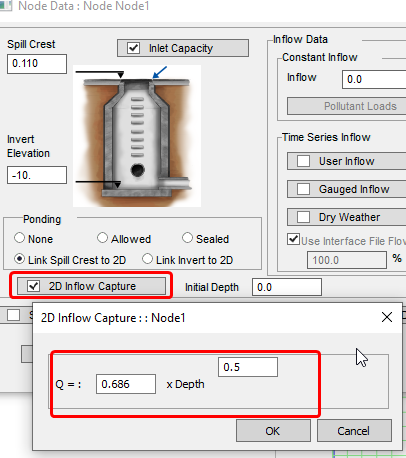

# Results

As shown in the figures below, it matches the manually calculated results very well. The model is: 2d_capture_model2.zip

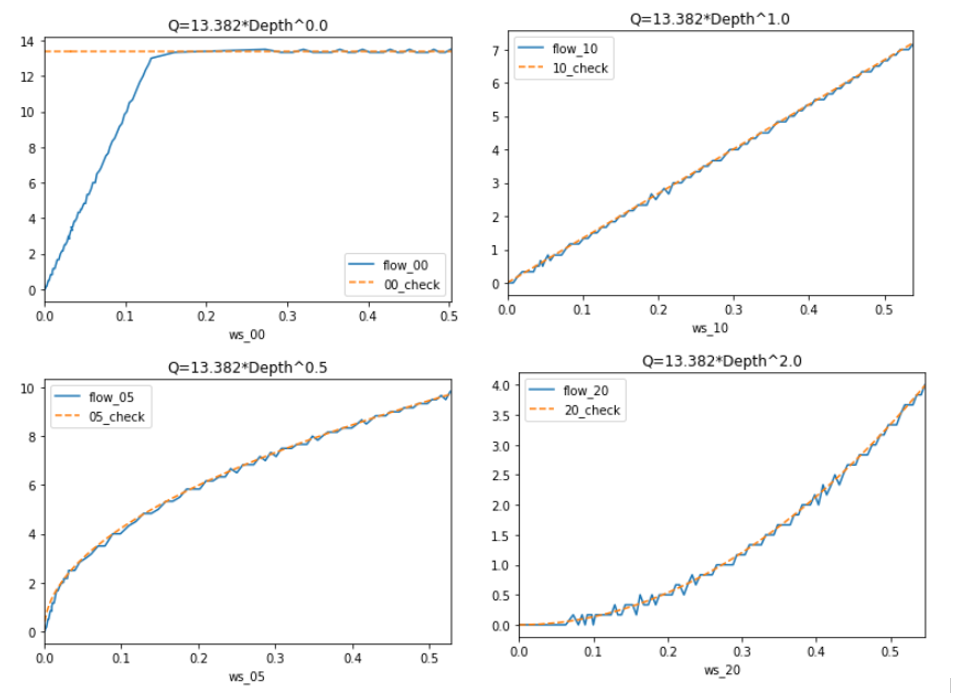

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib widget

In [2]:
ws = r'C:\Users\Mel.Meng\Documents\GitHub\xpswmm\models\1d2d\data'

# for inlet modeled as storage flow = (stage@ts2- stage@ts1)*area/ts
area = 10000 # storage constant area in ft2
ts = 60.0 # time step in sec
rim = 90 # rim elevation in ft

excel_path = os.path.join(ws, '2d inflow capture vs 1d inlet depth.xlsx')
df = pd.read_excel(excel_path, 'compare_2d_capture_model2')

for fld in df.columns:
    if 'ws_' in fld: # convert water surface as depth above rim
        df[fld] = df[fld] - rim
    if 'stage_' in fld: # calculate flow rates from stage
        sc = fld.replace('stage_', '')
        df['flow_%s' % sc] = df[fld].diff()*area/ts      

df = df[df['min'] < 100]

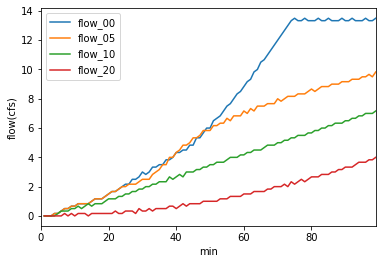

In [3]:

scenarios = ['00', '05', '10', '20']
ax = df.loc[:, ['flow_%s' % x for x in scenarios]].plot()
ax.set_xlabel('min')
ax.set_ylabel('flow(cfs)')
# ax.set_ylim(0, 20)
plt.show()

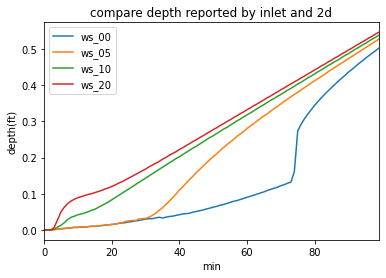

In [4]:

ax = df.loc[:, ['ws_%s' % x for x in scenarios]].plot()
ax.set_xlabel('min')
ax.set_ylabel('depth(ft)')
# ax.set_ylim(0, 20)
ax.set_title('compare depth reported by inlet and 2d')
plt.show()

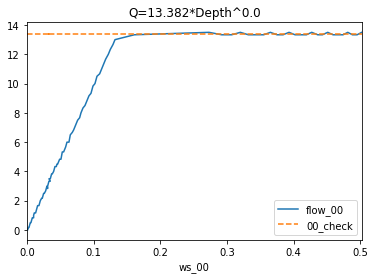

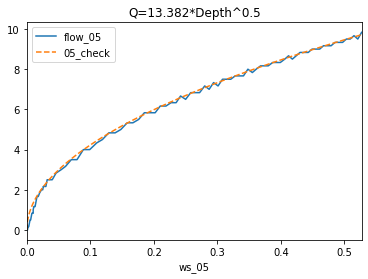

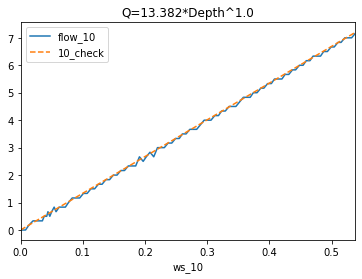

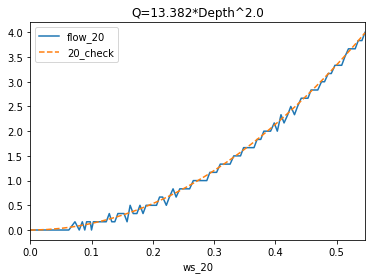

In [5]:
import numpy as np
ax = None


for sc in scenarios:
    if ax is None:
        ax = df.plot(x='ws_%s' % sc, y='flow_%s' % sc) #, figsize=(20, 10))
    else:
        df.plot(x='ws_%s' % sc, y='flow_%s' % sc, ax=ax)


    df.loc[df['ws_%s' % sc ]<0, 'ws_%s' % sc] = 0
    df['%s_check' % sc] = np.power(df['ws_%s' % sc], int(sc)/10.0)*13.382

    df.plot(x='ws_%s' % sc, y='%s_check' % sc, style='--', ax=ax)
    ax.set_title('Q=13.382*Depth^%.1f' % (int(sc)/10.0) )
    plt.show()
    ax = None
    
# df.plot(x='ws_2d_capture', y='2d_capture_check2', style='--', ax=ax)
# ax.set_ylim(0, 12.5)
